# Cài đặt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
!pip install gdown
import gdown

In [3]:
file_name = 'final.csv'
url = f'https://drive.google.com/file/d/10RRTPjtWPC77q0V7bMMdaIvxAxsYmH5y'
gdown.download(url, file_name, quiet=False)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/10RRTPjtWPC77q0V7bMMdaIvxAxsYmH5y
To: /content/final.csv
91.6kB [00:00, 31.6MB/s]


'final.csv'

In [5]:
df_read = pd.read_csv("final.csv")
df_read.head(20)

,Label,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh,dien_tt,...,dtbhk_3,dtbhk_4,dtbhk_5,dtbhk_6,sotchk_1,sotchk_2,sotchk_3,sotchk_4,sotchk_5,sotchk_6
0,TreHan,1995.0,1.0,hồ chí minh,ktpm0001,cnpm,cqui,8.0,d480103,thpt,...,6.40,7.01,6.35,6.77,22.0,18.0,26.0,19.0,20.0,19.0
1,TreHan,1995.0,1.0,đồng tháp,httt0001,httt,cttt,8.0,d480104,thpt,...,8.28,8.07,8.85,7.84,19.0,16.0,16.0,18.0,16.0,19.0
2,TreHan,1994.0,1.0,hà nam,khmt2013,khmt,cqui,8.0,d480101,thpt,...,6.30,2.83,3.61,1.11,22.0,20.0,23.0,24.0,20.0,17.0
3,TreHan,1995.0,1.0,hồ chí minh,httt0001,httt,cttt,8.0,d480104,thpt,...,6.40,5.81,6.80,6.72,19.0,13.0,21.0,21.0,16.0,19.0
4,TreHan,1995.0,1.0,hồ chí minh,mmtt0001,mmt&tt,cqui,8.0,d480201,thpt,...,7.35,6.70,8.07,8.22,22.0,21.0,24.0,20.0,15.0,17.0
5,TreHan,1995.0,0.0,hà tĩnh,ktpm0001,cnpm,cqui,8.0,d480103,thpt,...,7.95,8.48,7.69,7.96,22.0,22.0,19.0,21.0,16.0,15.0
6,TreHan,1995.0,1.0,quảng ngãi,httt0001,httt,cqui,8.0,d480104,thpt,...,5.30,4.80,5.66,5.60,22.0,30.0,25.0,24.0,28.0,33.0
7,TreHan,1994.0,1.0,hồ chí minh,khmt0001,khmt,cqui,8.0,d480101,thpt,...,5.79,6.83,7.31,5.64,22.0,21.0,28.0,30.0,27.0,20.0
8,TreHan,1995.0,1.0,khánh hoà,mmtt0001,mmt&tt,cqui,8.0,d480102,thpt,...,6.26,7.47,7.29,6.69,22.0,19.0,23.0,19.0,21.0,25.0
9,DungHan,1995.0,1.0,cần thơ,mtcl2013,ktmt,clc,8.0,d520214,thpt,...,6.70,8.04,7.59,7.40,22.0,22.0,23.0,14.0,15.0,16.0


In [6]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Label         3361 non-null   object 
 1   namsinh       3361 non-null   float64
 2   gioitinh      3361 non-null   float64
 3   noisinh       3361 non-null   object 
 4   lopsh         3361 non-null   object 
 5   khoa          3361 non-null   object 
 6   hedt          3361 non-null   object 
 7   khoahoc       3361 non-null   float64
 8   chuyennganh   3361 non-null   object 
 9   dien_tt       3361 non-null   object 
 10  lop12_matinh  3361 non-null   float64
 11  truong_thpt   3361 non-null   object 
 12  xlhv_1        3361 non-null   float64
 13  xlhv_2        3361 non-null   float64
 14  xlhv_3        3361 non-null   float64
 15  xlhv_4        3361 non-null   float64
 16  xlhv_5        3361 non-null   float64
 17  xlhv_6        3361 non-null   float64
 18  drl_1         3361 non-null 

In [7]:
df = df_read[['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6',
         'drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6',
         'dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6',
         'sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6', 'Label']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   xlhv_1    3361 non-null   float64
 1   xlhv_2    3361 non-null   float64
 2   xlhv_3    3361 non-null   float64
 3   xlhv_4    3361 non-null   float64
 4   xlhv_5    3361 non-null   float64
 5   xlhv_6    3361 non-null   float64
 6   drl_1     3361 non-null   object 
 7   drl_2     3361 non-null   object 
 8   drl_3     3361 non-null   object 
 9   drl_4     3361 non-null   object 
 10  drl_5     3361 non-null   object 
 11  drl_6     3361 non-null   object 
 12  dtbhk_1   3361 non-null   float64
 13  dtbhk_2   3361 non-null   float64
 14  dtbhk_3   3361 non-null   float64
 15  dtbhk_4   3361 non-null   float64
 16  dtbhk_5   3361 non-null   float64
 17  dtbhk_6   3361 non-null   float64
 18  sotchk_1  3361 non-null   float64
 19  sotchk_2  3361 non-null   float64
 20  sotchk_3  3361 non-null   floa

# Lập hàm tách bộ dữ liệu

### Lập hàm tách bộ dữ liệu sử dụng 1 hot-encoder


In [9]:
TARGET = 'Label'
RANDOM_STATE = 42

# Define categorical and numerical features
categorical_features = [f'drl_{i}' for i in range(1, 7)]

numerical_features = [f'xlhv_{i}' for i in range(1, 7)] + \
                     [f'dtbhk_{i}' for i in range(1, 7)] + \
                     [f'sotchk_{i}' for i in range(1, 7)]



In [10]:
def split_and_scale_data_onehot(df_in):
    # Separate target and features
    y = df_in[TARGET].copy()
    X = df_in.drop(columns=[TARGET]).copy()

    # One-hot encode categorical features
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
    encoded = onehot_encoder.fit_transform(X[categorical_features])
    encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

    # Combine numeric and encoded categorical features
    X = pd.concat([X[numerical_features].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

    # Split the data into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_STATE)

    # Impute missing values for numerical features
    imputer = SimpleImputer(strategy='mean')
    X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
    X_val[numerical_features] = imputer.transform(X_val[numerical_features])
    X_test[numerical_features] = imputer.transform(X_test[numerical_features])

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Convert to tensors for TensorFlow
    X_train_scaled_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
    X_val_scaled_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.float32)
    X_test_scaled_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

    return X_train_scaled_tensor, y_train, X_val_scaled_tensor, y_val, X_test_scaled_tensor, y_test, onehot_encoder, scaler, imputer

In [11]:
X_train_tensor, y_train, X_val_tensor, y_val, X_test_tensor, y_test, encoder, scaler, imputer = split_and_scale_data_onehot(df)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

# Define the input shape based on the number of features in your data
input_shape = X_train_tensor.shape[1]  # Number of features

# Build the model
model = keras.Sequential([
    layers.Input(shape=(input_shape,)),  # Use Input layer here
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall()])
# Compile the model with recall as the evaluation metric
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor, e.g., validation loss
    patience=5,          # Number of epochs to wait without improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored metric
)

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Define the label mapping for consistency
label_mapping = {'TreHan': 0, 'DungHan': 1}

# Apply mapping directly to the label column
y_train = y_train.map(label_mapping)
y_val = y_val.map(label_mapping)
y_test = y_test.map(label_mapping)

# Train the model
history = model.fit(
    X_train_tensor, y_train,
    validation_data=(X_val_tensor, y_val),
    epochs=50,  # Adjust the number of epochs as needed
    batch_size=32,  # Set batch size as preferred
    verbose=1
)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4501 - loss: 0.8304 - recall: 0.4840 - val_accuracy: 0.7440 - val_loss: 0.5555 - val_recall: 0.5753
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7283 - loss: 0.5376 - recall: 0.4744 - val_accuracy: 0.7946 - val_loss: 0.4723 - val_recall: 0.4658
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4743 - recall: 0.4041 - val_accuracy: 0.8006 - val_loss: 0.4406 - val_recall: 0.4384
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4606 - recall: 0.4043 - val_accuracy: 0.8214 - val_loss: 0.4209 - val_recall: 0.4658
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4293 - recall: 0.4439 - val_accuracy: 0.8155 - val_loss: 0.4051 - val_recall: 0.4521
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4467 - recall: 0.4537 - val_accuracy: 0.8185 - val_loss: 0.3937 - val_recall: 0.4384
Epoch 7/50
84/84

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7680 - loss: 0.4950 - recall: 0.5179 
Test Accuracy: 0.7567
Test Loss: 0.5388
Test Recall: 0.4615
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test F1 Score: 0.5060


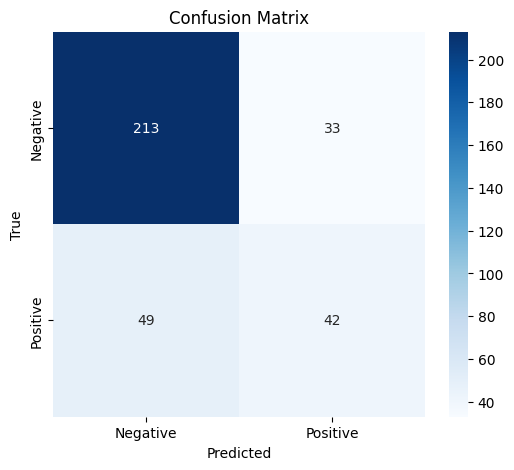

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Evaluate the model on the test set
test_loss, test_accuracy, test_recall = model.evaluate(X_test_tensor, y_test)

# Print the evaluation metrics
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Recall: {test_recall:.4f}')

# Predict on the test set (assuming your model outputs probabilities)
y_pred = (model.predict(X_test_tensor) > 0.5).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f'Test F1 Score: {f1:.4f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

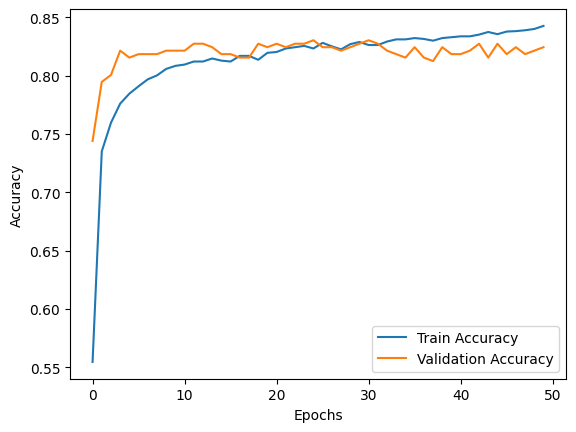

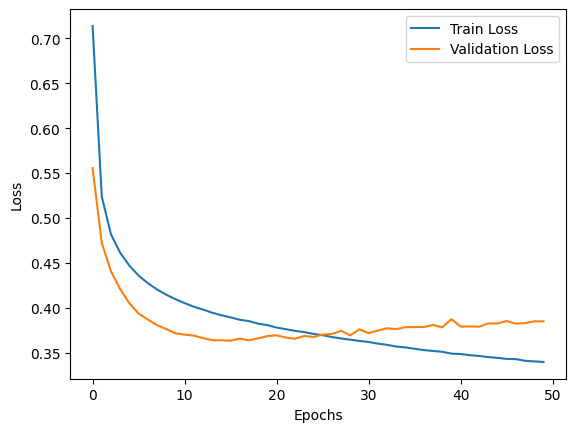

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
